# Mean Reversion  and Pairs Trading

- In this notebook I did an in- depth dive into NVDA as it relates to other major tech stocks.
- As a summary of my process, I first looked at the correlation of historical data for my basket of tech stocks over the last 3 years
- I used this result to determine NVDA having the strongest correlation with ORCL, AAPL,and MSFT
- From there I used the Augmented Dickey-Fuller Test and the Engle-Granger test to establish a significant cointegraion between NVDA and ORCL and was able to use the NVDA/ORCL price ratio as my baseline for my evaluation of NVDA and establish why current patterns are out of the norm.
- Finally I determined using the z_scores of those ratios to determine that NVDA is overweight, meaning that the stock is out performing bench marks by multiple standard deviations and it is generating exceeding returns for any portfolio it's in. 

This gathers all the relevant data from each of the major tickers and the SPY as a whole, the relevant data in this case being the adjusted closing information of each ticker.  

I considered a number of relevant stocks but ultimately graphed other major tech stocks, a company that plays a major role in supplying raw materials to NVDA, and companies purchasing a significant portion of their products to cast a wide net for companies who may be effected by NVDA's performance

In [138]:

import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2020, 9, 8), end=datetime(2023, 9, 8)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ["NVDA", "AAPL", "GOOG", "ORCL", "INTC", "TSLA", "MSFT","AMD","INTC","AMZN","BABA","SPY","TYO","BRK-B"] 
d = get_historical_Data(ticks)
print(d.shape)
# Most Recent Data
d.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
(755, 14)


,NVDA,AAPL,GOOG,ORCL,INTC,TSLA,MSFT,AMD,INTC,AMZN,BABA,SPY,TYO,BRK-B
Date,,,,,,,,,,,,,,
2023-08-31,493.509338,187.869995,137.350006,120.389999,35.139999,258.079987,327.760010,105.720001,35.139999,138.009995,92.900002,450.350006,13.91,360.200012
2023-09-01,485.050049,189.460007,136.800003,120.930000,36.610001,245.009995,328.660004,109.449997,36.610001,138.119995,95.010002,451.190002,14.25,362.459991
2023-09-05,485.440033,189.699997,136.710007,123.980003,36.709999,256.489990,333.549988,110.779999,36.709999,137.270004,94.650002,449.239990,14.45,360.470001
2023-09-06,470.609985,182.910004,135.369995,124.330002,36.980000,251.919998,332.880005,109.279999,36.980000,135.360001,94.449997,446.220001,14.53,361.670013
2023-09-07,462.410004,177.559998,136.199997,125.089996,38.180000,251.490005,329.910004,106.589996,38.180000,137.850006,89.970001,444.850006,14.42,361.799988


Using a heat map it's easy to visualize the correlations between closing prices, it's clear to see there are very solid correlations with  NVDA-ORCL, NVDA- AAPL, and  NVDA-MSFT, I will be using those to do my projections moving forward

<Axes: >

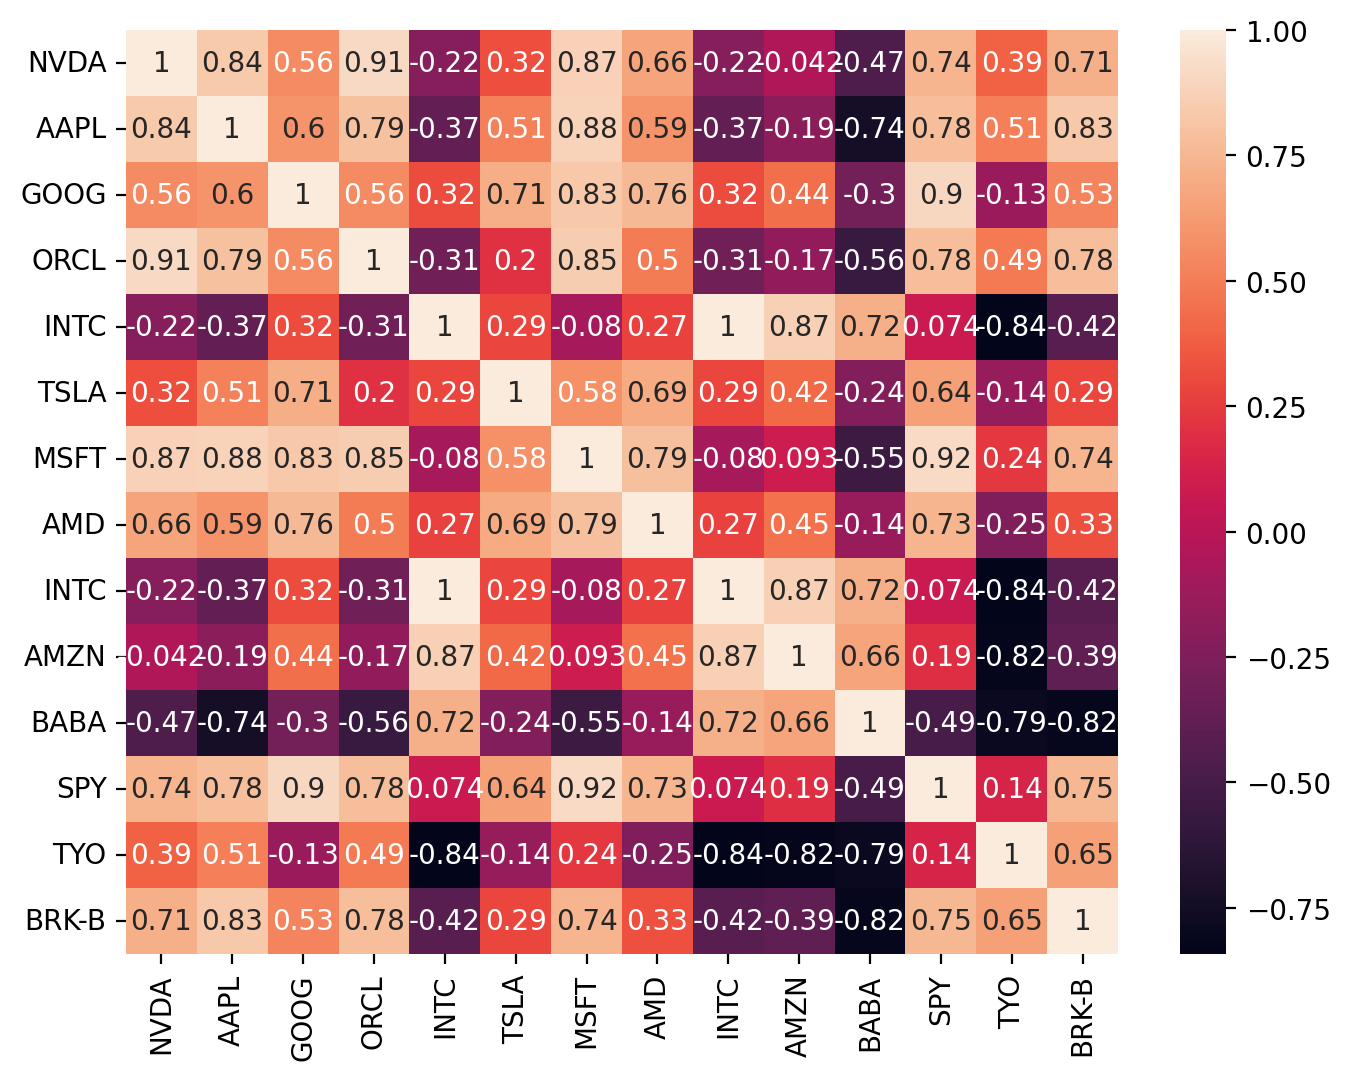

In [139]:
import seaborn as sn
from matplotlib.pyplot import figure
corr_matrix = d.corr()
figure(figsize=(8, 6), dpi=200)
sn.heatmap(corr_matrix, annot = True)

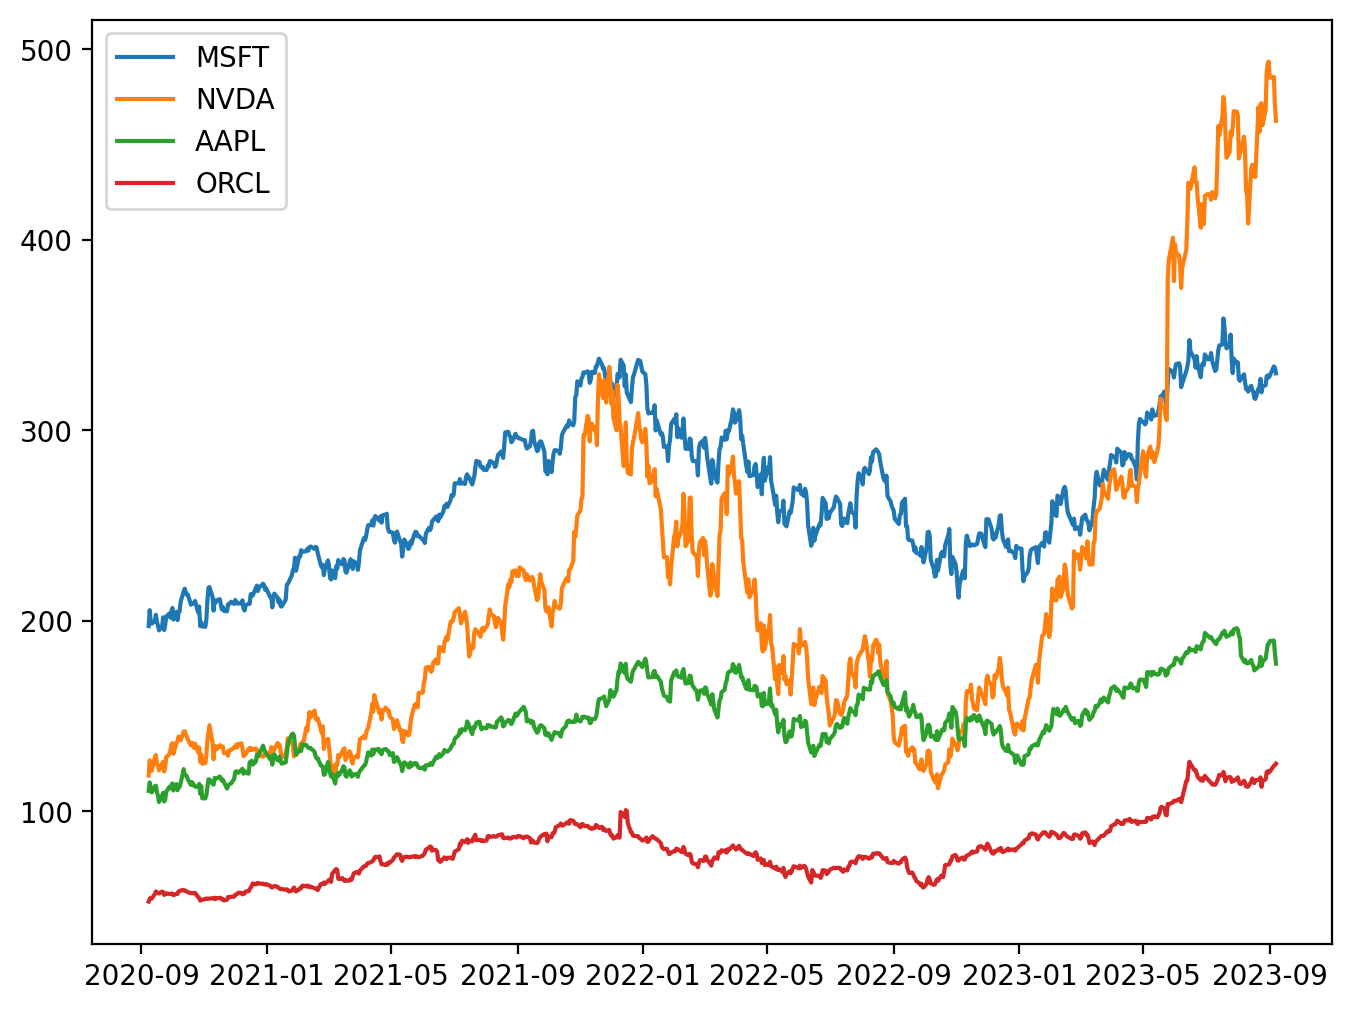

Now that I have established the time series I will be working with, I can assess whether the ratio of the stocks can be considered a stationary time series. If our ratios were stationary it would mean consistent variance, mean value, and autocorrelation through the whole runtime of the time series.  If the P values generated by the Augmented Dickey-Fuller Test are <.05 it's would be ideal and mean our series is stationary

In [126]:
from statsmodels.tsa.stattools import adfuller

Ratio_ADF = adfuller(NVDA / ORCL)
print('P value for the Augmented Dickey-Fuller Test  for NVDA/ORCL is', Ratio_ADF[1])
Ratio_ADF2 = adfuller(NVDA / AAPL)
print('P value for the Augmented Dickey-Fuller Test  for NVDA/ORCL is', Ratio_ADF2[1])
Ratio_ADF3 = adfuller(NVDA / MSFT)
print('P value for the Augmented Dickey-Fuller Test  for NVDA/MSFT is', Ratio_ADF3[1])


P value for the Augmented Dickey-Fuller Test  for NVDA/ORCL is 0.5211091228290013
P value for the Augmented Dickey-Fuller Test  for NVDA/ORCL is 0.9692504965902451
P value for the Augmented Dickey-Fuller Test  for NVDA/MSFT is 0.9736081235231933


Okay so that's unfortunate, the relationships between our stocks aren't stationary. Unfortunate but expected.  
Despite that we can test for cointergration and assess whether there is a long-term equalibrium between the time series of our stocks. By doing so we can assess whether the stocks trading patterns change in the same way and as a result make decisions on for one stock based on the other. Once again As the P value approaches 0 the ratio of between the series becomes more stationary, making pair trading more straight-forward/predicatable  as it is more likely trade in a similar pattern moving forward. In this case I'm using the Engle-Granger test which is a different version of the ADF test used before which can measure for more general trends.  (P <.5 is ideal)

In [141]:

import statsmodels.tsa.stattools as ts 
result = ts.coint(NVDA, ORCL)
result2 = ts.coint(NVDA, AAPL)
result3 = ts.coint(NVDA, MSFT)

In [142]:
# Cointegration test: A technique used to find a potential correlation in a time series (long term)
# Determines if the spread between the two assets are constant over time.
# Null Hypothesis: Spread between series are non-stationary.
# Uses the augmented Engle-Granger two-step cointegration test.
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('NVDA/ORCL')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)

cointegration_t_statistic2 = result2[0]
p_val2 = result2[1]
critical_values_test_statistic_at_1_5_102 = result2[2]
print('NVDA/AAPL')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val2)

cointegration_t_statistic3 = result3[0]
p_val3 = result3[1]
critical_values_test_statistic_at_1_5_103 = result3[2]
print('NVDA/MSFT')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val3)

NVDA/ORCL
P value for the augmented Engle-Granger two-step cointegration test is 0.10138849353743312
NVDA/AAPL
P value for the augmented Engle-Granger two-step cointegration test is 0.7346021065041323
NVDA/MSFT
P value for the augmented Engle-Granger two-step cointegration test is 0.9805663030581013


Once again, no wishes are granted by the stock fairy, but the cointegration between NVDA and ORCL is very close to the target value of P = .05. This means that even though the trading patterns don't map perfectly onto one another, the accuracy is more than enough to make predictions as a correlation is clear. I explain what I believe to be the root of this correlation in the associated PDF, it should be clearly labeled.  




Let's take a look at the ratio our cointegration tells us is mapped so well.  Using Z_score values I mapped standard deviations of the data onto the chart to demonstrate how far off away from the standard distribution the allocated data is and effectively demonstrate the overweight nature of the stock. Notably at the moment it is ~2.5 standard deviations away from the the expected ratio, demonstrating that NVDA is significantly out performing expectations.  Notably this not a map of the price, it's a graph of the expected price relative to a bound we stablished as consistent with the stock, the price of ORCL.

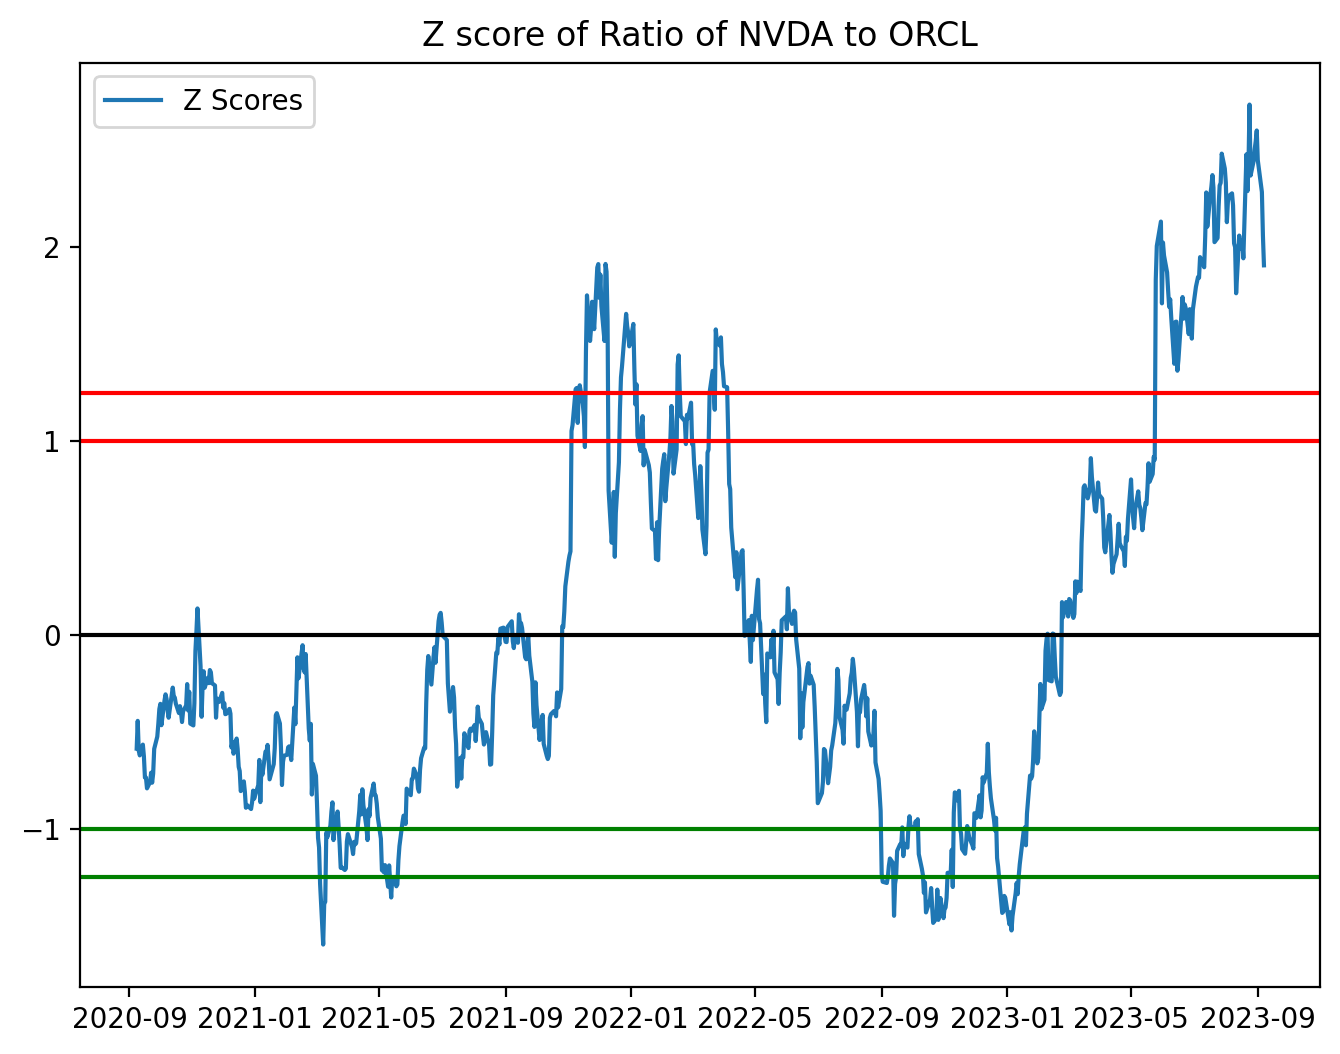

In [129]:

figure(figsize=(8, 6), dpi=200)
ratio = NVDA / ORCL
# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of NVDA to ORCL')
plt.show()


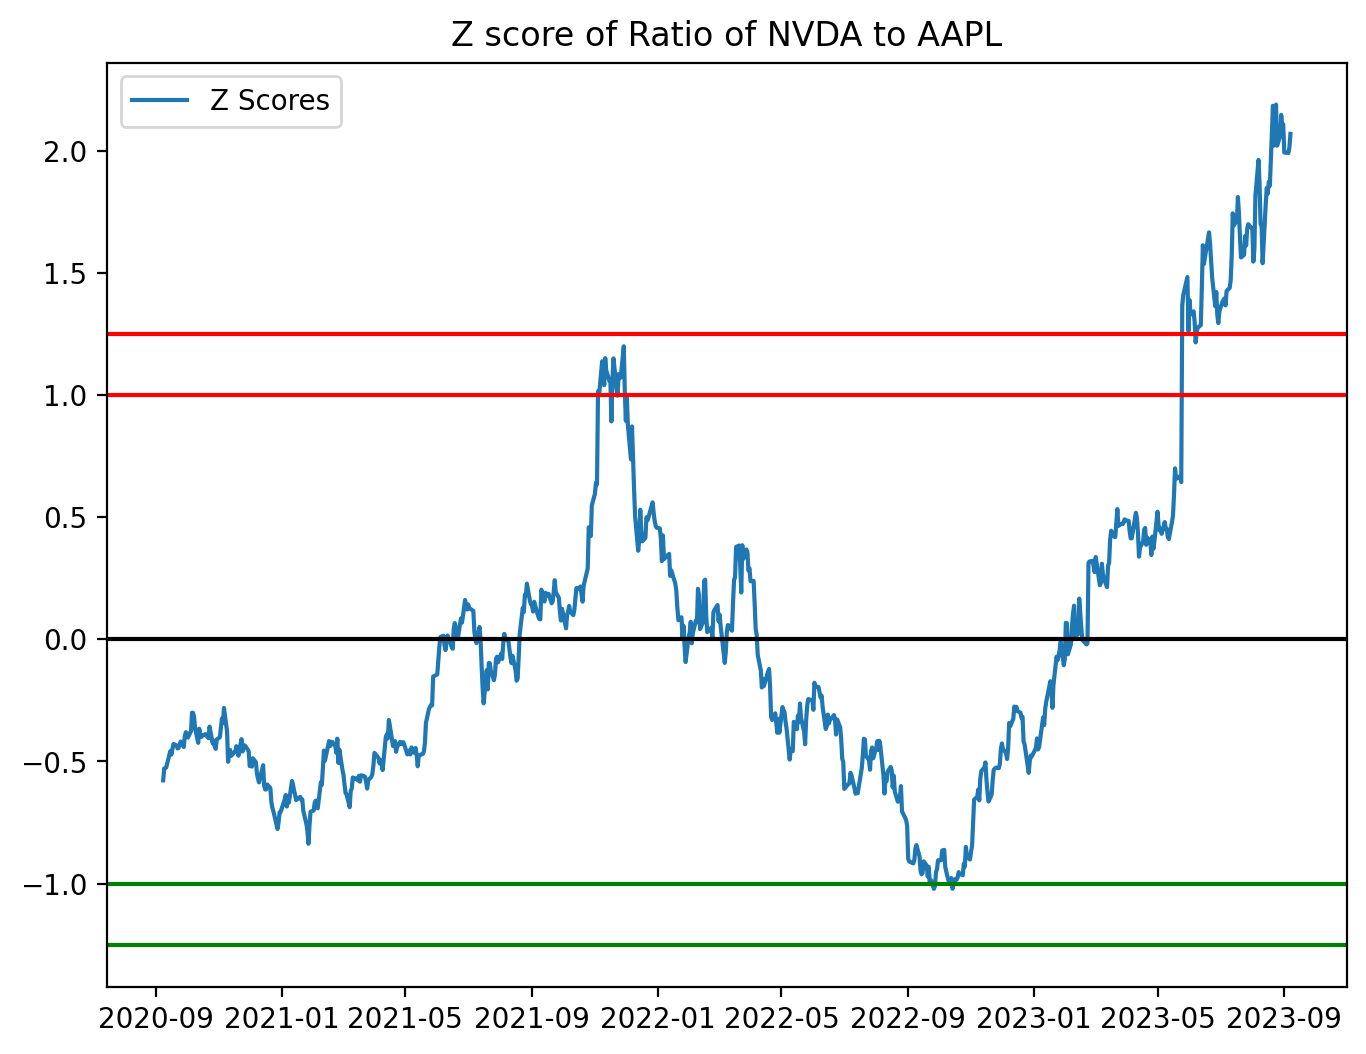

In [130]:

figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
ratio2 = NVDA / AAPL
df_zscore = (ratio2 - ratio2.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of NVDA to AAPL')
plt.show()

As we mentioned before, AAPL is directly cointegrated to NVDA meaning it the second chart doesn't guarantee correlated growth in the same way the first one does, but it does effectively show the extent to which NVDA has exploded in value. 

By understanding that the expected value of the portfolio has this ratio and NVDA eventually returning to the expected standard range, it's easy to see that NVDA is overweight as it's significantly out performing expectations, especially in the last 6 months. 

I just did the rolling averages to show I knew how to smooth out data and show off some skillz that may be of interest as it's incredibly helpful as a tool to understand and make data more eye ball friendly. 

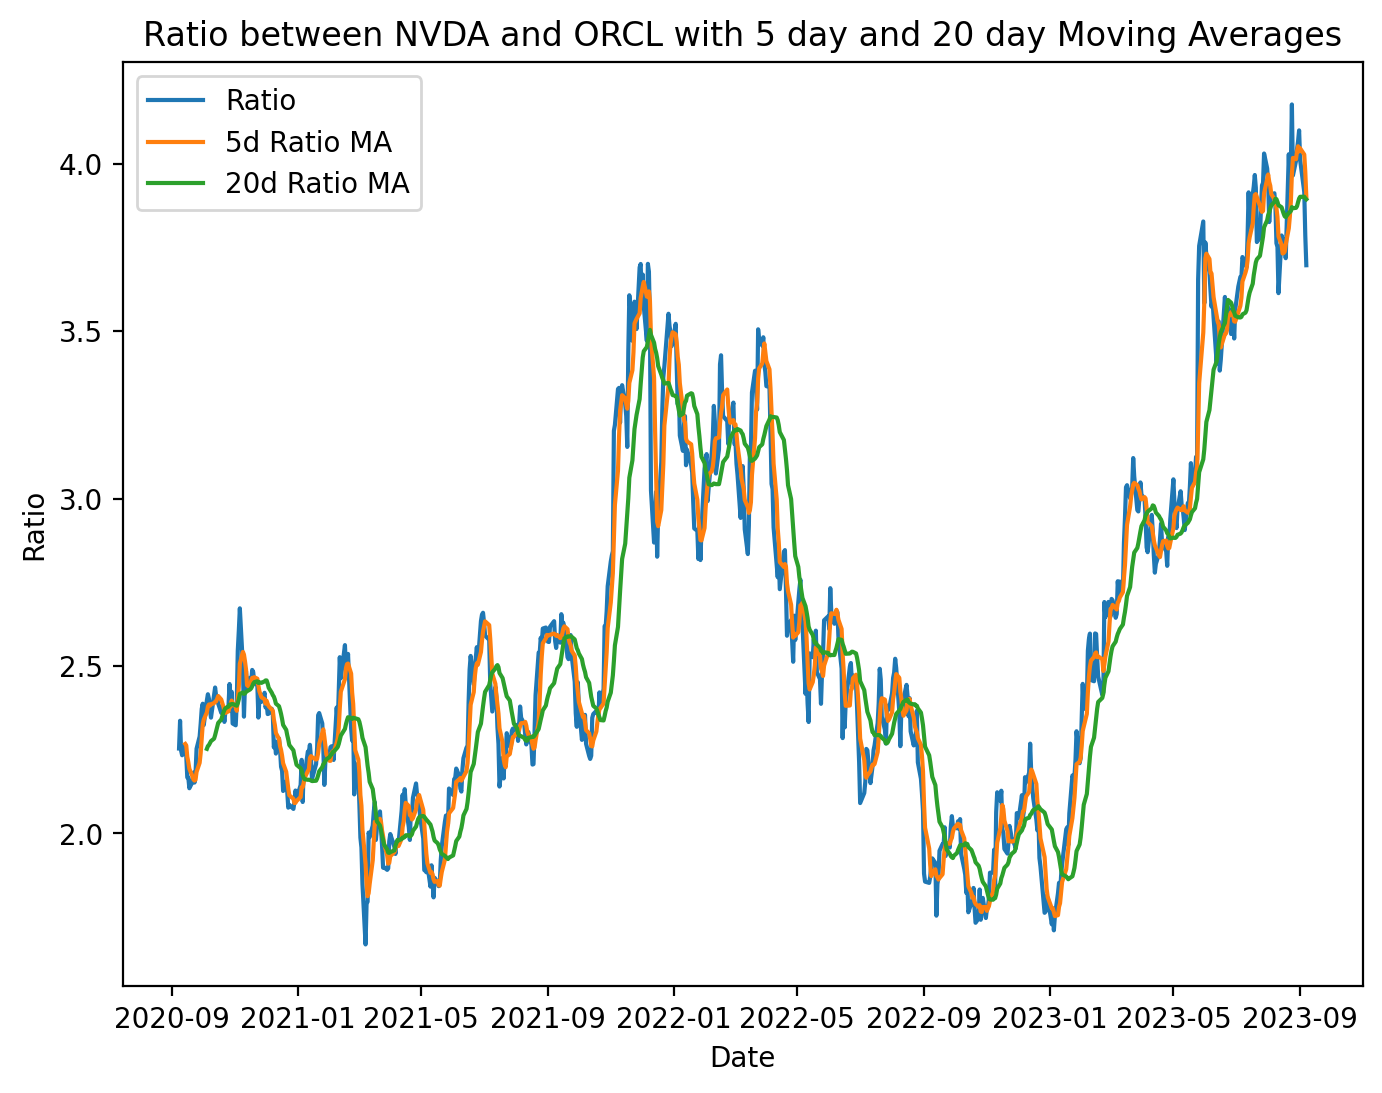

In [131]:
figure(figsize=(8, 6), dpi=200)
ratios_mavg5_NO = ratio.rolling(window=5, center=False).mean()
ratios_mavg20_NO = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5_NO - ratios_mavg20_NO)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5_NO.index, ratios_mavg5_NO.values)
plt.plot(ratios_mavg20_NO.index, ratios_mavg20_NO.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('Ratio between NVDA and ORCL with 5 day and 20 day Moving Averages')
plt.show()

Another way I visualized the explosion away from the mean that NVDA has had was by generating buy and sell signals to help visualize NVDA's jumps from the norm. In this case it's clear that NVDA is consistently more than one standard deviation above it's baseline established by the ratio. 

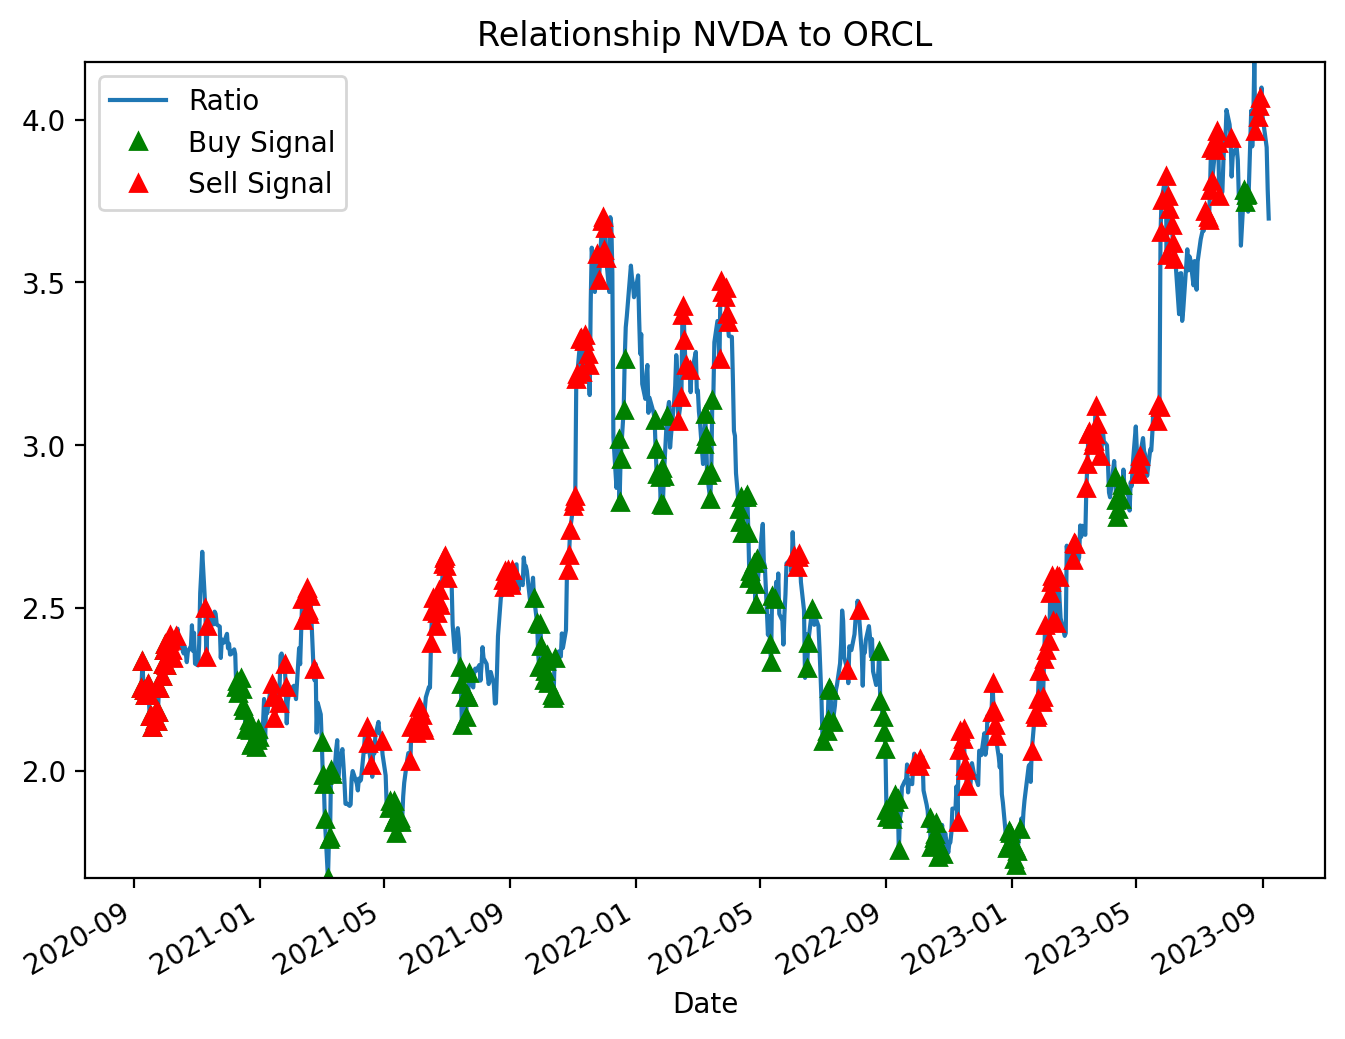

In [ ]:
figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship NVDA to ORCL')
plt.show()